In [1]:
import sys
from pathlib import Path
import os

# Get the directory of the current script
script_dir = Path(os.getcwd()).resolve()

# Add the src directory to the Python path
sys.path.append(str(Path(script_dir / '../src').resolve()))

# Add the scripts directory to the Python path
sys.path.append(str(Path(script_dir / '../scripts').resolve()))

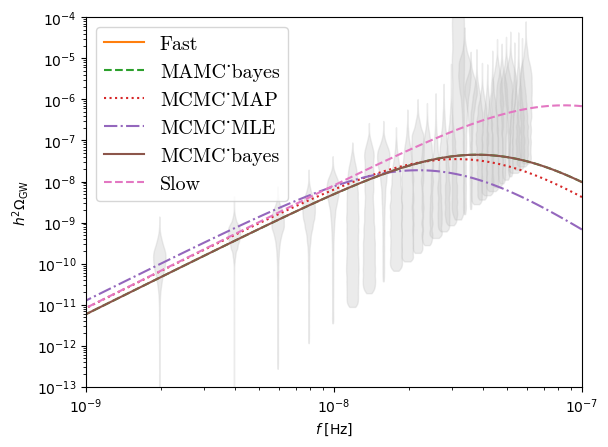

In [2]:
from matplotlib import ticker
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob

font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }

plt.rc('font', **font)

# Find all files matching the pattern GW_*.pkl
file_pattern = '../data/processed/plots/GW_*.pkl'
files = glob.glob(file_pattern)
files.sort()

def myticks(x,pos):
    exponent = int(x)
    coeff = x/10**exponent
    return r"$10^{{ {:2d} }}$".format(exponent)

with open('../data/processed/plots/NG15.pkl', 'rb') as f:
    fig, ax = pickle.load(f)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(myticks))
major = np.linspace(-100, 100, 201)
ax.xaxis.set_major_locator(ticker.FixedLocator(major))
minors = np.array([ -50+(np.floor(i/10)+np.log10(1+10*(i/10-np.floor(i/10)))) for i in np.arange(1,1000,1)])
ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(myticks))
major = np.linspace(-100, 100, 201)
ax.yaxis.set_major_locator(ticker.FixedLocator(major))
minors = np.array([ -50+(np.floor(i/10)+np.log10(1+10*(i/10-np.floor(i/10)))) for i in np.arange(1,1000,1)])
ax.yaxis.set_minor_locator(ticker.FixedLocator(minors))
ax.set_ylabel(r'$h^2 \Omega_\mathrm{GW}$')

x = np.linspace(-7, -9, 100)
x = 10**x


def extract_number(filename):
    # Exctract the vev value from the filename
    try:
        import re
        match = re.search(r'GW_vev = (\d+) MeV', filename)
        if match:
            return int(match.group(1))
        return 0  # Return 0 if no match is found
    except:
        return 0

# Sort the files based on the extracted number
files.sort(key=extract_number)


styles = ['-', '--', ':', '-.']

i = 0
j = len(styles)
# Loop through each file
for file in files:
    # Extract the spectrum name from the file name
    spectrum_name = file.replace("../data/processed/plots/GW_", "")
    spectrum_name = spectrum_name.replace(".pkl", "")
    
    # Import the file as an object
    with open(file, 'rb') as f:
        spectrum = pickle.load(f)
        ax.plot(np.log10(x), np.log10(spectrum.Omegah2(x)), label=f"{spectrum_name}", linestyle=styles[i%j])
        i += 1

plt.margins(0)
ax.set_ylim(-13, -4)
ax.set_ylabel(r'$h^2 \Omega_\mathrm{GW}$')
plt.legend(fontsize='large')

plt.savefig('../data/processed/plots/NG15.pdf', dpi=300, bbox_inches='tight')

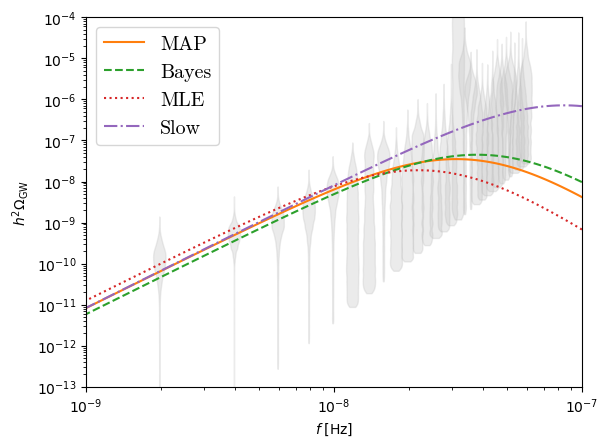

In [3]:
from matplotlib import ticker
import pickle
import numpy as np
import matplotlib.pyplot as plt

font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }

plt.rc('font', **font)

# Set the directory where the pkl files are stored
pkl_dir = '../data/processed/plots/GW_'

def myticks(x,pos):
    exponent = int(x)
    coeff = x/10**exponent
    return r"$10^{{ {:2d} }}$".format(exponent)

with open('../data/processed/plots/NG15.pkl', 'rb') as f:
    fig, ax = pickle.load(f)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(myticks))
major = np.linspace(-100, 100, 201)
ax.xaxis.set_major_locator(ticker.FixedLocator(major))
minors = np.array([ -50+(np.floor(i/10)+np.log10(1+10*(i/10-np.floor(i/10)))) for i in np.arange(1,1000,1)])
ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(myticks))
major = np.linspace(-100, 100, 201)
ax.yaxis.set_major_locator(ticker.FixedLocator(major))
minors = np.array([ -50+(np.floor(i/10)+np.log10(1+10*(i/10-np.floor(i/10)))) for i in np.arange(1,1000,1)])
ax.yaxis.set_minor_locator(ticker.FixedLocator(minors))
ax.set_ylabel(r'$h^2 \Omega_\mathrm{GW}$')

x = np.linspace(-7, -9, 100)
x = 10**x


try:
    with open(pkl_dir + 'MCMC_MAP.pkl', 'rb') as f:
        spectrum = pickle.load(f)
        ax.plot(np.log10(x), np.log10(spectrum.Omegah2(x)), label="MAP", linestyle = '-')
except:
    pass


try:
    with open(pkl_dir + 'MCMC_bayes.pkl', 'rb') as f:
        spectrum = pickle.load(f)
        ax.plot(np.log10(x), np.log10(spectrum.Omegah2(x)), label="Bayes", linestyle = '--')
except:
    pass

try:
    with open(pkl_dir + 'MCMC_MLE.pkl', 'rb') as f:
        spectrum = pickle.load(f)
        ax.plot(np.log10(x), np.log10(spectrum.Omegah2(x)), label="MLE", linestyle = ':')
except:
    pass

try:
    with open(pkl_dir + 'Slow.pkl', 'rb') as f:
        spectrum = pickle.load(f)
        ax.plot(np.log10(x), np.log10(spectrum.Omegah2(x)), label="Slow", linestyle = '-.')
except:
    pass

plt.margins(0)
ax.set_ylim(-13, -4)
ax.set_ylabel(r'$h^2 \Omega_\mathrm{GW}$')
plt.legend(fontsize='large', loc='upper left')

plt.savefig('../data/processed/plots/manual/NG15_MCMC.pdf', dpi=300, bbox_inches='tight')

In [4]:
latex_names = {
    "lambda": r"$\lambda_\phi$",
    "g": r"$g_D$",
    "vev": r"$v_\phi^0$ (MeV)",
    "m_phi": r"$m_{\phi}$ (MeV)",
    "m_Z": r"$m_{Z'}$ (MeV)",
    "T_crit": r"$T_\textrm{critical}$ (MeV)",
    "T_nuc": r"$T_\textrm{nucleation}$ (MeV)",
    "T_perc": r"$T_\textrm{percolation}$ (MeV)",
    "T_completion": r"$T_\textrm{completion}$ (MeV)",
    "T_min": r"$T_\textrm{minimal}$ (MeV)",
    "T_reh": r"$T_\textrm{reheating}$ (MeV)",
    "Minimal value of P_f": r"$P_f^{\rm min}$",
    "alpha": r"$\alpha$",
    "alpha_inf": r"$\alpha_\infty$",
    "alpha_eq": r"$\alpha_{\rm eq}$",
    "gamma_*": r"$\gamma_*$",
    "gamma_eq": r"$\gamma_{\rm eq}$",
    "Is physical?": r"Physical?",
    "Is runaway?": r"Runaway?",
    "RH": r"$R_\textrm{sep}{}_* H_*$"
}

import math

def format_smart_number(x):
    if x == 0:
        return "$0.00$"

    exponent = math.floor(math.log10(abs(x)))

    if exponent < -1 or exponent > 1:
        # Format as scientific notation
        coeff = x / (10 ** exponent)
        return f"${coeff:.3g} \\times 10^{{{exponent}}}$"
    else:
        return f"${x:.2f}$"

from collections import OrderedDict

def is_float(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

def parse_file(filepath):
    data = OrderedDict()
    with open(filepath, 'r') as f:
        for line in f:
            if '=' in line:
                parts = line.strip().split(',')
                for part in parts:
                    if '=' in part:
                        key, val = part.strip().split('=', 1)
                        key = key.strip()
                        val = val.strip()

                        # Remove units (e.g., " MeV") for parsing
                        has_mev = " MeV" in val
                        val_clean = val.replace(" MeV", "")

                        # Format numeric values
                        if is_float(val_clean):
                            val_num = float(val_clean)
                            formatted = format_smart_number(val_num)
                            val = formatted #+ (" MeV" if has_mev else "")

                        data[key] = val
    return data


def to_latex_table(data_list, name_list):
    # data_list: list of OrderedDicts
    # name_list: list of names for the columns

    # Construct the complete list of keys, maintaining the order from the first dictionary
    all_keys = list(data_list[0].keys())
    for d in data_list[1:]:
        for k in d:
            if k not in all_keys:
                all_keys.append(k)

    # Header LaTeX
    col_format = '|c' + '|c' * len(data_list) + '|'
    latex = [rf"\begin{{tabular}}{{{col_format}}}", r"\hline"]

    header = "Quantity & " + " & ".join(name_list) + r" \\"
    latex.append(header)
    latex.append(r"\hline")

    for key in all_keys:
        display_key = latex_names.get(key, key)
        row = [display_key]
        for d in data_list:
            row.append(d.get(key, "--"))
        latex.append(" & ".join(row) + r" \\")
        latex.append(r"\hline")

    latex.append(r"\end{tabular}")
    return '\n'.join(latex)

# Load data from files
data_dir = "../data/processed/plots/"
map_data = parse_file(data_dir + "MCMC_MAP.txt")
bayes_data = parse_file(data_dir + "MCMC_bayes.txt")

files = [data_dir + "MCMC_MAP.txt", data_dir + "MCMC_bayes.txt", data_dir + "MCMC_MLE.txt", data_dir + "Slow.txt",  data_dir + "Fast.txt"]
data_list = [parse_file(f) for f in files]
name_list = ["MAP", "Bayes", "MLE", "Slow", "Fast"]

# Generate LaTeX table
latex_code = to_latex_table(data_list, name_list)

# Output to terminal or file
print(latex_code)
with open("comparison_table.tex", "w") as f:
    f.write(latex_code)

\begin{tabular}{|c|c|c|c|c|c|}
\hline
Quantity & MAP & Bayes & MLE & Slow & Fast \\
\hline
$\lambda_\phi$ & $5.33 \times 10^{-3}$ & $1.12 \times 10^{-2}$ & $5.47 \times 10^{-2}$ & $6 \times 10^{-3}$ & $1.5 \times 10^{-3}$ \\
\hline
$g_D$ & $0.73$ & $0.88$ & $1.36$ & $0.75$ & $0.50$ \\
\hline
$v_\phi^0$ (MeV) & $42.12$ & $50.86$ & $20.36$ & $5 \times 10^{2}$ & $5 \times 10^{2}$ \\
\hline
$m_{\phi}$ (MeV) & $4.35$ & $7.60$ & $6.73$ & $54.77$ & $27.39$ \\
\hline
$m_{Z'}$ (MeV) & $30.65$ & $44.72$ & $27.59$ & $3.75 \times 10^{2}$ & $2.5 \times 10^{2}$ \\
\hline
$T_\textrm{critical}$ (MeV) & $9.48$ & $13.64$ & $7.60$ & $1.16 \times 10^{2}$ & $88.50$ \\
\hline
$T_\textrm{nucleation}$ (MeV) & $1.46$ & $3.74$ & $3.71$ & $16.56$ & $43.82$ \\
\hline
$T_\textrm{percolation}$ (MeV) & $1.23$ & $3.04$ & $3.10$ & $11.72$ & $43.22$ \\
\hline
$T_\textrm{completion}$ (MeV) & $1.13$ & $2.73$ & $2.77$ & $7.16$ & $43.14$ \\
\hline
$T_\textrm{minimal}$ (MeV) & $0.00$ & $0.00$ & $0.00$ & $0.00$ & $37.08$ \\
